## Tensorflow Classification Project

In [370]:
# Written by Tyler Beetle for Python for Data Science and Machine Learning Bootcamp Udemy Course.

In [371]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [372]:
df = pd.read_csv('../data/cancer_class.csv')

In [373]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [374]:
#df.describe().transpose()

<Axes: xlabel='benign_0__mal_1', ylabel='count'>

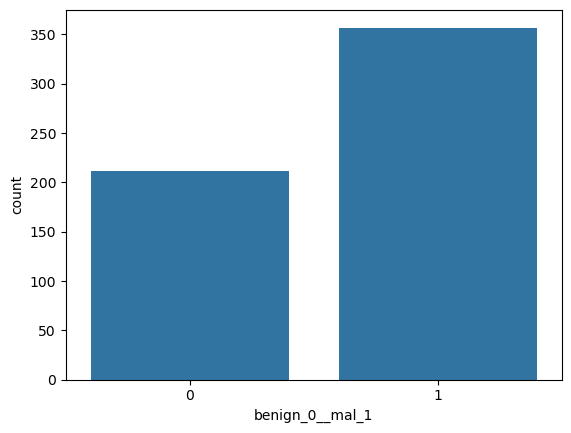

In [375]:
sns.countplot(x='benign_0__mal_1', data=df)

<Axes: >

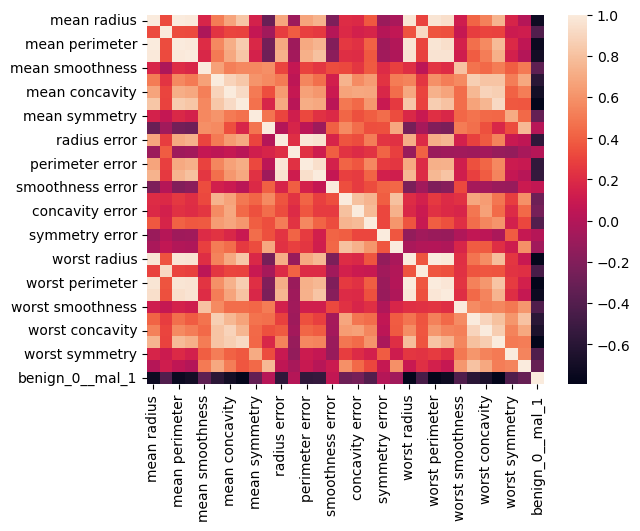

In [376]:
sns.heatmap(df.corr())

In [377]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<Axes: >

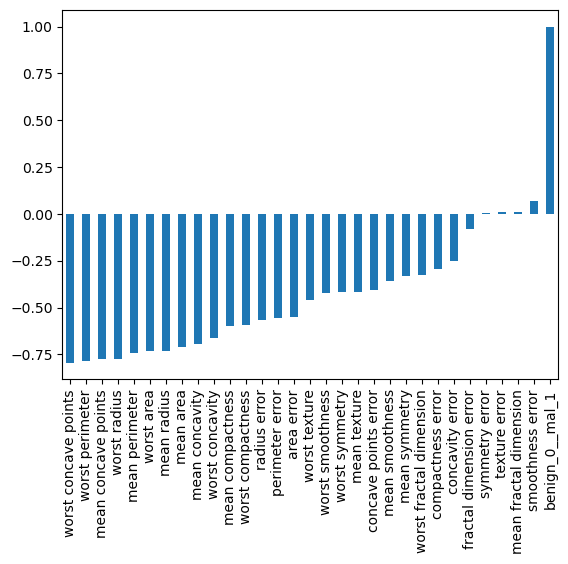

In [378]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<Axes: >

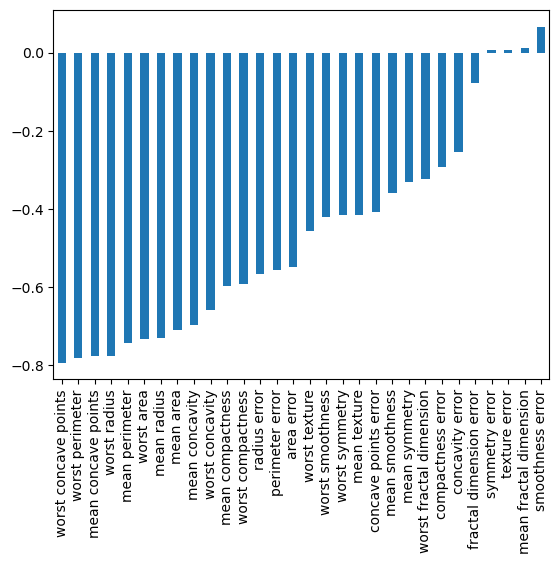

In [379]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

In [380]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [381]:
from sklearn.model_selection import train_test_split

In [382]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [383]:
from sklearn.preprocessing import MinMaxScaler

In [384]:
scaler = MinMaxScaler()

In [385]:
scaler.fit(X_train)

MinMaxScaler()

In [386]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [387]:
from tensorflow.keras.models import Sequential

In [388]:
from tensorflow.keras.layers import Dense, Dropout

In [389]:
X_train.shape

(426, 30)

In [390]:
model = Sequential()

model.add(Dense(units=30, activation='relu'))

model.add(Dense(units=15, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [391]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), verbose=1)

Epoch 1/600
14/14 [==============================] - 1s 10ms/step - loss: 0.7029 - val_loss: 0.6827
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6557 - val_loss: 0.6399
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6111 - val_loss: 0.5904
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5595 - val_loss: 0.5354
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5068 - val_loss: 0.4846
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4582 - val_loss: 0.4355
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4164 - val_loss: 0.3972
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3746 - val_loss: 0.3546
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3389 - val_loss: 0.3259
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3094 - val_loss: 0.2915
Epoch 11

In [392]:
losses = pd.DataFrame(model.history.history)

<Axes: >

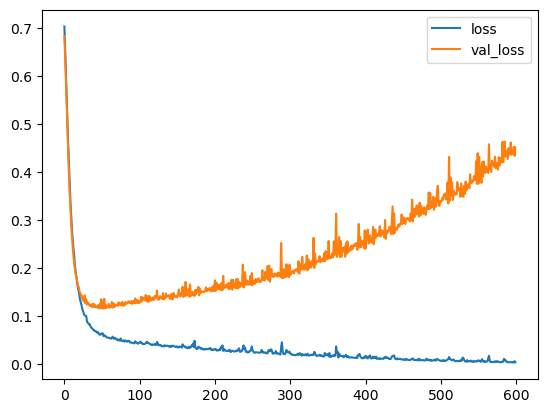

In [393]:
losses.plot()

In [394]:
model2 = Sequential()

model2.add(Dense(30, activation='relu'))

model2.add(Dense(15, activation='relu'))

model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam')

In [395]:
from tensorflow.keras.callbacks import EarlyStopping

In [396]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [397]:
model2.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=1)

Epoch 1/600
14/14 [==============================] - 1s 9ms/step - loss: 0.6812 - val_loss: 0.6636
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6480 - val_loss: 0.6281
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6100 - val_loss: 0.5906
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5715 - val_loss: 0.5515
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5293 - val_loss: 0.5077
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4871 - val_loss: 0.4633
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4452 - val_loss: 0.4199
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4048 - val_loss: 0.3792
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3674 - val_loss: 0.3414
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3357 - val_loss: 0.3098
Epoch 11/

<Axes: >

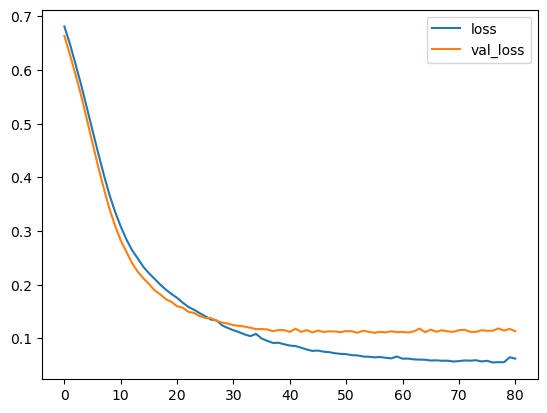

In [398]:
model2_loss = pd.DataFrame(model2.history.history)
model2_loss.plot()

In [399]:
from tensorflow.keras.layers import Dropout

In [400]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [401]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 1s 10ms/step - loss: 0.7262 - val_loss: 0.6926
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6993 - val_loss: 0.6685
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6687 - val_loss: 0.6538
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6481 - val_loss: 0.6356
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6358 - val_loss: 0.6137
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6192 - val_loss: 0.5885
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5940 - val_loss: 0.5586
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5644 - val_loss: 0.5294
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5500 - val_loss: 0.4968
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5305 - val_loss: 0.4635
Epoch 11

<Axes: >

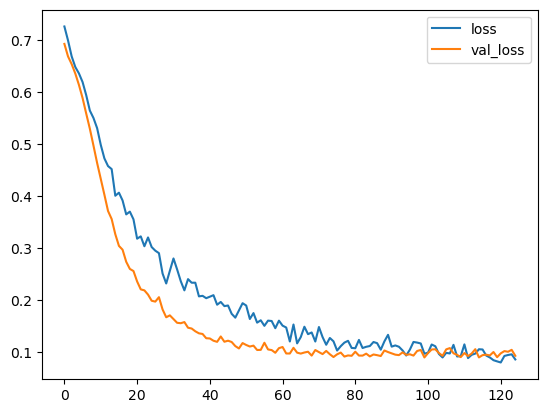

In [402]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [403]:
predictions = model.predict(X_test)

5/5 [==============================] - 0s 1ms/step


In [404]:
from sklearn.metrics import classification_report, confusion_matrix

In [405]:
predicted_classes = (predictions > 0.5).astype(int)

In [408]:
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [409]:
print(confusion_matrix(y_test, predicted_classes))

[[54  1]
 [ 2 86]]
